In [46]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import scipy.stats as stats
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [47]:
#reading the Cl cvs file
df_cl = pd.read_csv("Merging\Chlorophyll\Cl2014_2022.csv", encoding = 'unicode_escape', sep = ',')
#Removing a weird letter in the name of the thrid column
df_cl.columns = ['Datum', 'Uhrzeit', 'Chlorophyll_[µg/l]']
#Showing the data
df_cl

Datum   Uhrzeit  Chlorophyll_[µg/l]
0       2014-01-01  01:00:00                5.08
1       2014-01-01  01:10:00                 NaN
2       2014-01-01  01:20:00                 NaN
3       2014-01-01  01:30:00                 NaN
4       2014-01-01  01:40:00                 NaN
...            ...       ...                 ...
282628  2022-12-31  23:10:00                 NaN
282629  2022-12-31  23:20:00                 NaN
282630  2022-12-31  23:30:00                4.94
282631  2022-12-31  23:40:00                 NaN
282632  2022-12-31  23:50:00                 NaN

[282633 rows x 3 columns]

In [48]:
#reading the O2 csv file
df_o = pd.read_csv("Merging\Sauerstoffgehalt\O1988_2022.csv", encoding = 'unicode_escape', sep = ',')
df_o

Datum   Uhrzeit  Sauerstoffgehalt_[mg/l]
0        1988-06-19  01:00:00                      8.1
1        1988-06-19  01:05:00                      8.1
2        1988-06-19  01:10:00                      8.1
3        1988-06-19  01:15:00                      8.1
4        1988-06-19  01:20:00                      8.1
...             ...       ...                      ...
1679896  2022-12-31  23:10:00                      NaN
1679897  2022-12-31  23:20:00                      NaN
1679898  2022-12-31  23:30:00                      NaN
1679899  2022-12-31  23:40:00                      NaN
1679900  2022-12-31  23:50:00                      NaN

[1679901 rows x 3 columns]

In [49]:
#O2 has values from 1988 to 2022 while Cl has from 2014 to 2022 => merge them with inner
df_o_cl = df_cl.merge(df_o, on = ['Datum', 'Uhrzeit'], how ="inner")
df_o_cl

Datum   Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]
0       2014-01-01  01:00:00                5.08                     12.8
1       2014-01-01  01:10:00                 NaN                     12.9
2       2014-01-01  01:20:00                 NaN                     12.9
3       2014-01-01  01:30:00                 NaN                     12.9
4       2014-01-01  01:40:00                 NaN                     12.9
...            ...       ...                 ...                      ...
281803  2022-12-31  23:10:00                 NaN                      NaN
281804  2022-12-31  23:20:00                 NaN                      NaN
281805  2022-12-31  23:30:00                4.94                      NaN
281806  2022-12-31  23:40:00                 NaN                      NaN
281807  2022-12-31  23:50:00                 NaN                      NaN

[281808 rows x 4 columns]

In [50]:
#reading the Tideniedrigwasser 
df_tidehoch = pd.read_csv("Water_level\Bunthaus_Tidehochwasser.csv", encoding = 'unicode_escape', sep = ';')
#Delete empty void cols
del df_tidehoch["Unnamed: 3"]
del df_tidehoch["Unnamed: 4"]
#Changing the format of date and tim to date and time
df_tidehoch['Datum'] = pd.to_datetime(df_tidehoch['Datum'])
df_tidehoch['Uhrzeit'] = pd.to_datetime(df_tidehoch['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_tidehoch.info()
df_tidehoch
df_tidehoch

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6056 entries, 0 to 6055
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datum                6056 non-null   datetime64[ns]
 1   Uhrzeit              6056 non-null   object        
 2   Tidehochwasser_[cm]  6056 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 142.1+ KB


Datum   Uhrzeit  Tidehochwasser_[cm]
0    2014-01-01  03:58:00                  721
1    2014-01-01  16:36:00                  735
2    2014-01-02  04:55:00                  702
3    2014-01-02  17:26:00                  712
4    2014-01-03  05:37:00                  774
...         ...       ...                  ...
6051 2022-07-29  17:41:00                  713
6052 2022-07-30  06:07:00                  697
6053 2022-07-30  18:16:00                  723
6054 2022-07-31  06:45:00                  702
6055 2022-07-31  18:49:00                  745

[6056 rows x 3 columns]

In [51]:
#Reading Tidehochwasser csv file
df_tideniedrig = pd.read_csv("Water_level\Bunthaus_Tideniedrigwasser.csv", encoding = 'unicode_escape', sep = '\t')
#Delete empty void cols
del df_tideniedrig["Unnamed: 3"]
del df_tideniedrig["Unnamed: 4"]
#Changing the format of date and tim to date and time
df_tideniedrig['Datum'] = pd.to_datetime(df_tideniedrig['Datum'])
df_tideniedrig['Uhrzeit'] = pd.to_datetime(df_tideniedrig['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_tideniedrig.info()
df_tideniedrig

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6055 entries, 0 to 6054
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datum                   6055 non-null   datetime64[ns]
 1   Uhrzeit                 6055 non-null   object        
 2   Tideniedrigwasser_[cm]  6055 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 142.0+ KB


Datum   Uhrzeit  Tideniedrigwasser_[cm]
0    2014-01-01  11:42:00                     352
1    2014-01-02  00:11:00                     370
2    2014-01-02  12:36:00                     346
3    2014-01-03  00:39:00                     376
4    2014-01-03  13:38:00                     364
...         ...       ...                     ...
6050 2022-07-29  12:37:00                     338
6051 2022-07-30  01:07:00                     339
6052 2022-07-30  13:13:00                     344
6053 2022-07-31  01:43:00                     343
6054 2022-07-31  13:44:00                     350

[6055 rows x 3 columns]

In [52]:
#Drop the rows with missing values for better readability and faster computetaion
df_o_cl.dropna(subset=['Chlorophyll_[µg/l]', 'Sauerstoffgehalt_[mg/l]'], inplace = True )
#Change the forma to datetime
df_o_cl['Datum'] = pd.to_datetime(df_o_cl['Datum'])
df_o_cl['Uhrzeit'] = pd.to_datetime(df_o_cl['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_o_cl.info()
df_o_cl

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97709 entries, 0 to 281274
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Datum                    97709 non-null  datetime64[ns]
 1   Uhrzeit                  97709 non-null  object        
 2   Chlorophyll_[µg/l]       97709 non-null  float64       
 3   Sauerstoffgehalt_[mg/l]  97709 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.7+ MB


Datum   Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]
0      2014-01-01  01:00:00                5.08                    12.80
6      2014-01-01  02:00:00                4.75                    12.90
13     2014-01-01  03:10:00                4.39                    12.90
19     2014-01-01  04:10:00                4.47                    12.90
26     2014-01-01  05:20:00                4.96                    12.90
...           ...       ...                 ...                      ...
281246 2022-12-28  02:20:00                1.87                    13.02
281253 2022-12-28  03:30:00                0.53                    13.04
281260 2022-12-28  04:40:00                0.00                    12.92
281267 2022-12-28  05:50:00                1.36                    12.98
281274 2022-12-28  07:00:00                1.93                    12.92

[97709 rows x 4 columns]

In [53]:
#Exporting to csv file
df_o_cl.to_csv('Merging\O2_Cl\O2_Cl.csv', index = False)

In [54]:
#Merging the df_o_cl with Tidewasser df
df_o_cl_tide = df_o_cl.merge(df_tidehoch, how='outer').merge(df_tideniedrig, how='outer')
df_o_cl_tide.head(50)

Datum   Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
0  2014-01-01  01:00:00                5.08                     12.8   
1  2014-01-01  02:00:00                4.75                     12.9   
2  2014-01-01  03:10:00                4.39                     12.9   
3  2014-01-01  04:10:00                4.47                     12.9   
4  2014-01-01  05:20:00                4.96                     12.9   
5  2014-01-01  06:30:00                5.53                     12.8   
6  2014-01-01  07:30:00                4.42                     12.7   
7  2014-01-01  08:40:00                4.29                     12.9   
8  2014-01-01  09:40:00                4.77                     13.0   
9  2014-01-01  10:50:00                4.34                     13.1   
10 2014-01-01  12:00:00                5.40                     12.9   
11 2014-01-01  13:00:00                4.64                     12.9   
12 2014-01-01  14:10:00                5.52                     13.0   
13 2014-01-01  15:10:00                4.85                     12.9   
14 2014-01-01  16:20:00                5.03                     12.8   
15 2014-01-01  17:30:00                5.13                     12.9   
16 2014-01-01  18:30:00                4.69                     12.9   
17 2014-01-01  19:40:00                5.33                     12.8   
18 2014-01-01  20:40:00                5.22                     12.9   
19 2014-01-01  21:50:00                4.92                     13.1   
20 2014-01-01  22:50:00                5.08                     13.2   
21 2014-01-02  00:00:00                5.44                     13.0   
22 2014-01-02  01:10:00                5.04                     12.9   
23 2014-01-02  02:10:00                5.61                     13.0   
24 2014-01-02  03:20:00                4.15                     13.1   
25 2014-01-02  04:20:00                4.80                     13.0   
26 2014-01-02  05:30:00                4.85                     13.0   
27 2014-01-02  06:40:00                5.20                     13.0   
28 2014-01-02  07:40:00                5.22                     12.8   
29 2014-01-02  08:50:00                4.97                     12.8   
30 2014-01-02  09:50:00                4.73                     13.0   
31 2014-01-02  12:20:00                4.93                     13.0   
32 2014-01-02  13:20:00                4.32                     13.0   
33 2014-01-02  14:30:00                4.61                     13.0   
34 2014-01-02  15:40:00                4.77                     13.1   
35 2014-01-02  16:40:00                4.30                     13.0   
36 2014-01-02  17:50:00                4.98                     13.0   
37 2014-01-02  18:50:00                4.77                     13.0   
38 2014-01-02  20:00:00                5.62                     13.0   
39 2014-01-02  21:10:00                5.09                     12.9   
40 2014-01-02  22:10:00                5.50                     13.1   
41 2014-01-02  23:20:00                5.38                     13.2   
42 2014-01-03  00:20:00                5.22                     13.1   
43 2014-01-03  01:30:00                4.73                     13.0   
44 2014-01-03  02:40:00                5.14                     13.1   
45 2014-01-03  03:40:00                4.90                     13.1   
46 2014-01-03  04:50:00                4.87                     13.0   
47 2014-01-03  05:50:00                4.88                     12.9   
48 2014-01-03  07:00:00                5.29                     13.0   
49 2014-01-03  08:00:00                5.15                     13.1   

    Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  
0                   NaN                     NaN  
1                   NaN                     NaN  
2                   NaN                     NaN  
3                   NaN                     NaN  
4                   NaN                     NaN  
5                   NaN            

In [55]:
#Merge the two columns od Datum and Uhrzeit to one column and make them UTC
df_o_cl__tide_datehr = df_o_cl_tide.copy(deep=True)
df_o_cl__tide_datehr["Datum"] = df_o_cl__tide_datehr['Datum'].astype(str) +" "+ df_o_cl__tide_datehr["Uhrzeit"].astype(str)
df_o_cl__tide_datehr["Datum"] = pd.to_datetime(df_o_cl__tide_datehr["Datum"], format='%Y-%m-%d %H:%M:%S', errors='coerce', utc = True)
del df_o_cl__tide_datehr["Uhrzeit"] 
df_o_cl__tide_datehr.rename(columns={"Datum": "Datum_Uhrzeit"}, inplace=True)
df_o_cl__tide_datehr.sort_values(by='Datum_Uhrzeit', inplace = True)
df_o_cl__tide_datehr = df_o_cl__tide_datehr.reset_index(drop=True)
df_o_cl__tide_datehr.info()
df_o_cl__tide_datehr.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109533 entries, 0 to 109532
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   Datum_Uhrzeit            109533 non-null  datetime64[ns, UTC]
 1   Chlorophyll_[µg/l]       97709 non-null   float64            
 2   Sauerstoffgehalt_[mg/l]  97709 non-null   float64            
 3   Tidehochwasser_[cm]      6056 non-null    float64            
 4   Tideniedrigwasser_[cm]   6055 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(4)
memory usage: 4.2 MB


Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
0  2014-01-01 01:00:00+00:00                5.08                     12.8   
1  2014-01-01 02:00:00+00:00                4.75                     12.9   
2  2014-01-01 03:10:00+00:00                4.39                     12.9   
3  2014-01-01 03:58:00+00:00                 NaN                      NaN   
4  2014-01-01 04:10:00+00:00                4.47                     12.9   
5  2014-01-01 05:20:00+00:00                4.96                     12.9   
6  2014-01-01 06:30:00+00:00                5.53                     12.8   
7  2014-01-01 07:30:00+00:00                4.42                     12.7   
8  2014-01-01 08:40:00+00:00                4.29                     12.9   
9  2014-01-01 09:40:00+00:00                4.77                     13.0   
10 2014-01-01 10:50:00+00:00                4.34                     13.1   
11 2014-01-01 11:42:00+00:00                 NaN                      NaN   
12 2014-01-01 12:00:00+00:00                5.40                     12.9   
13 2014-01-01 13:00:00+00:00                4.64                     12.9   
14 2014-01-01 14:10:00+00:00                5.52                     13.0   
15 2014-01-01 15:10:00+00:00                4.85                     12.9   
16 2014-01-01 16:20:00+00:00                5.03                     12.8   
17 2014-01-01 16:36:00+00:00                 NaN                      NaN   
18 2014-01-01 17:30:00+00:00                5.13                     12.9   
19 2014-01-01 18:30:00+00:00                4.69                     12.9   
20 2014-01-01 19:40:00+00:00                5.33                     12.8   
21 2014-01-01 20:40:00+00:00                5.22                     12.9   
22 2014-01-01 21:50:00+00:00                4.92                     13.1   
23 2014-01-01 22:50:00+00:00                5.08                     13.2   
24 2014-01-02 00:00:00+00:00                5.44                     13.0   
25 2014-01-02 00:11:00+00:00                 NaN                      NaN   
26 2014-01-02 01:10:00+00:00                5.04                     12.9   
27 2014-01-02 02:10:00+00:00                5.61                     13.0   
28 2014-01-02 03:20:00+00:00                4.15                     13.1   
29 2014-01-02 04:20:00+00:00                4.80                     13.0   
30 2014-01-02 04:55:00+00:00                 NaN                      NaN   
31 2014-01-02 05:30:00+00:00                4.85                     13.0   
32 2014-01-02 06:40:00+00:00                5.20                     13.0   
33 2014-01-02 07:40:00+00:00                5.22                     12.8   
34 2014-01-02 08:50:00+00:00                4.97                     12.8   
35 2014-01-02 09:50:00+00:00                4.73                     13.0   
36 2014-01-02 12:20:00+00:00                4.93                     13.0   
37 2014-01-02 12:36:00+00:00                 NaN                      NaN   
38 2014-01-02 13:20:00+00:00                4.32                     13.0   
39 2014-01-02 14:30:00+00:00                4.61                     13.0   
40 2014-01-02 15:40:00+00:00                4.77                     13.1   
41 2014-01-02 16:40:00+00:00                4.30                     13.0   
42 2014-01-02 17:26:00+00:00                 NaN                      NaN   
43 2014-01-02 17:50:00+00:00                4.98                     13.0   
44 2014-01-02 18:50:00+00:00                4.77                     13.0   
45 2014-01-02 20:00:00+00:00                5.62                     13.0   
46 2014-01-02 21:10:00+00:00                5.09                     12.9   
47 2014-01-02 22:10:00+00:00                5.50                     13.1   
48 2014-01-02 23:20:00+00:00                5.38                     13.2   
49 2014-01-03 00:20:00+00:00                5.22                     13.1   

    Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  
0                   NaN              

In [56]:
#Just a check
df_o_cl__tide_datehr[df_o_cl__tide_datehr['Datum_Uhrzeit'] == '2022-07-31 18:49:00']

Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
106671 2022-07-31 18:49:00+00:00                 NaN                      NaN   

        Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  
106671                745.0                     NaN

In [57]:
#Changing NaN THW and TNW values to 0
df_o_cl__tide_datehr['Tideniedrigwasser_[cm]'].fillna(0, inplace = True)
df_o_cl__tide_datehr['Tidehochwasser_[cm]'].fillna(0, inplace = True)
#df_o_cl__tide_datehr['Tideniedrigwasser_[cm]'][df_o_cl__tide_datehr['Tideniedrigwasser_[cm]'] > 0] = np.nan
#df_o_cl__tide_datehr['Tideniedrigwasser_[cm]'].fillna(1, inplace = True)
#df_o_cl_tide[(df_o_cl_tide['Jahr'] == 2016) & (df_o_cl_tide['Monat'] == 7)].tail(50)
df_o_cl__tide_datehr.head(50)

Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
0  2014-01-01 01:00:00+00:00                5.08                     12.8   
1  2014-01-01 02:00:00+00:00                4.75                     12.9   
2  2014-01-01 03:10:00+00:00                4.39                     12.9   
3  2014-01-01 03:58:00+00:00                 NaN                      NaN   
4  2014-01-01 04:10:00+00:00                4.47                     12.9   
5  2014-01-01 05:20:00+00:00                4.96                     12.9   
6  2014-01-01 06:30:00+00:00                5.53                     12.8   
7  2014-01-01 07:30:00+00:00                4.42                     12.7   
8  2014-01-01 08:40:00+00:00                4.29                     12.9   
9  2014-01-01 09:40:00+00:00                4.77                     13.0   
10 2014-01-01 10:50:00+00:00                4.34                     13.1   
11 2014-01-01 11:42:00+00:00                 NaN                      NaN   
12 2014-01-01 12:00:00+00:00                5.40                     12.9   
13 2014-01-01 13:00:00+00:00                4.64                     12.9   
14 2014-01-01 14:10:00+00:00                5.52                     13.0   
15 2014-01-01 15:10:00+00:00                4.85                     12.9   
16 2014-01-01 16:20:00+00:00                5.03                     12.8   
17 2014-01-01 16:36:00+00:00                 NaN                      NaN   
18 2014-01-01 17:30:00+00:00                5.13                     12.9   
19 2014-01-01 18:30:00+00:00                4.69                     12.9   
20 2014-01-01 19:40:00+00:00                5.33                     12.8   
21 2014-01-01 20:40:00+00:00                5.22                     12.9   
22 2014-01-01 21:50:00+00:00                4.92                     13.1   
23 2014-01-01 22:50:00+00:00                5.08                     13.2   
24 2014-01-02 00:00:00+00:00                5.44                     13.0   
25 2014-01-02 00:11:00+00:00                 NaN                      NaN   
26 2014-01-02 01:10:00+00:00                5.04                     12.9   
27 2014-01-02 02:10:00+00:00                5.61                     13.0   
28 2014-01-02 03:20:00+00:00                4.15                     13.1   
29 2014-01-02 04:20:00+00:00                4.80                     13.0   
30 2014-01-02 04:55:00+00:00                 NaN                      NaN   
31 2014-01-02 05:30:00+00:00                4.85                     13.0   
32 2014-01-02 06:40:00+00:00                5.20                     13.0   
33 2014-01-02 07:40:00+00:00                5.22                     12.8   
34 2014-01-02 08:50:00+00:00                4.97                     12.8   
35 2014-01-02 09:50:00+00:00                4.73                     13.0   
36 2014-01-02 12:20:00+00:00                4.93                     13.0   
37 2014-01-02 12:36:00+00:00                 NaN                      NaN   
38 2014-01-02 13:20:00+00:00                4.32                     13.0   
39 2014-01-02 14:30:00+00:00                4.61                     13.0   
40 2014-01-02 15:40:00+00:00                4.77                     13.1   
41 2014-01-02 16:40:00+00:00                4.30                     13.0   
42 2014-01-02 17:26:00+00:00                 NaN                      NaN   
43 2014-01-02 17:50:00+00:00                4.98                     13.0   
44 2014-01-02 18:50:00+00:00                4.77                     13.0   
45 2014-01-02 20:00:00+00:00                5.62                     13.0   
46 2014-01-02 21:10:00+00:00                5.09                     12.9   
47 2014-01-02 22:10:00+00:00                5.50                     13.1   
48 2014-01-02 23:20:00+00:00                5.38                     13.2   
49 2014-01-03 00:20:00+00:00                5.22                     13.1   

    Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  
0                   0.0              

In [58]:
#Changing THW values to 2
df_o_cl__tide_datehr['Tidehochwasser_[cm]'][df_o_cl__tide_datehr['Tidehochwasser_[cm]'] > 0] = np.nan
df_o_cl__tide_datehr['Tidehochwasser_[cm]'].fillna(2, inplace = True)
#Info and df
df_o_cl__tide_datehr.info()
df_o_cl__tide_datehr.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109533 entries, 0 to 109532
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   Datum_Uhrzeit            109533 non-null  datetime64[ns, UTC]
 1   Chlorophyll_[µg/l]       97709 non-null   float64            
 2   Sauerstoffgehalt_[mg/l]  97709 non-null   float64            
 3   Tidehochwasser_[cm]      109533 non-null  float64            
 4   Tideniedrigwasser_[cm]   109533 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4)
memory usage: 4.2 MB


C:\Users\Shayan Kamali\AppData\Local\Temp\ipykernel_9236\854050821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o_cl__tide_datehr['Tidehochwasser_[cm]'][df_o_cl__tide_datehr['Tidehochwasser_[cm]'] > 0] = np.nan


Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
0  2014-01-01 01:00:00+00:00                5.08                     12.8   
1  2014-01-01 02:00:00+00:00                4.75                     12.9   
2  2014-01-01 03:10:00+00:00                4.39                     12.9   
3  2014-01-01 03:58:00+00:00                 NaN                      NaN   
4  2014-01-01 04:10:00+00:00                4.47                     12.9   
5  2014-01-01 05:20:00+00:00                4.96                     12.9   
6  2014-01-01 06:30:00+00:00                5.53                     12.8   
7  2014-01-01 07:30:00+00:00                4.42                     12.7   
8  2014-01-01 08:40:00+00:00                4.29                     12.9   
9  2014-01-01 09:40:00+00:00                4.77                     13.0   
10 2014-01-01 10:50:00+00:00                4.34                     13.1   
11 2014-01-01 11:42:00+00:00                 NaN                      NaN   
12 2014-01-01 12:00:00+00:00                5.40                     12.9   
13 2014-01-01 13:00:00+00:00                4.64                     12.9   
14 2014-01-01 14:10:00+00:00                5.52                     13.0   
15 2014-01-01 15:10:00+00:00                4.85                     12.9   
16 2014-01-01 16:20:00+00:00                5.03                     12.8   
17 2014-01-01 16:36:00+00:00                 NaN                      NaN   
18 2014-01-01 17:30:00+00:00                5.13                     12.9   
19 2014-01-01 18:30:00+00:00                4.69                     12.9   
20 2014-01-01 19:40:00+00:00                5.33                     12.8   
21 2014-01-01 20:40:00+00:00                5.22                     12.9   
22 2014-01-01 21:50:00+00:00                4.92                     13.1   
23 2014-01-01 22:50:00+00:00                5.08                     13.2   
24 2014-01-02 00:00:00+00:00                5.44                     13.0   
25 2014-01-02 00:11:00+00:00                 NaN                      NaN   
26 2014-01-02 01:10:00+00:00                5.04                     12.9   
27 2014-01-02 02:10:00+00:00                5.61                     13.0   
28 2014-01-02 03:20:00+00:00                4.15                     13.1   
29 2014-01-02 04:20:00+00:00                4.80                     13.0   
30 2014-01-02 04:55:00+00:00                 NaN                      NaN   
31 2014-01-02 05:30:00+00:00                4.85                     13.0   
32 2014-01-02 06:40:00+00:00                5.20                     13.0   
33 2014-01-02 07:40:00+00:00                5.22                     12.8   
34 2014-01-02 08:50:00+00:00                4.97                     12.8   
35 2014-01-02 09:50:00+00:00                4.73                     13.0   
36 2014-01-02 12:20:00+00:00                4.93                     13.0   
37 2014-01-02 12:36:00+00:00                 NaN                      NaN   
38 2014-01-02 13:20:00+00:00                4.32                     13.0   
39 2014-01-02 14:30:00+00:00                4.61                     13.0   
40 2014-01-02 15:40:00+00:00                4.77                     13.1   
41 2014-01-02 16:40:00+00:00                4.30                     13.0   
42 2014-01-02 17:26:00+00:00                 NaN                      NaN   
43 2014-01-02 17:50:00+00:00                4.98                     13.0   
44 2014-01-02 18:50:00+00:00                4.77                     13.0   
45 2014-01-02 20:00:00+00:00                5.62                     13.0   
46 2014-01-02 21:10:00+00:00                5.09                     12.9   
47 2014-01-02 22:10:00+00:00                5.50                     13.1   
48 2014-01-02 23:20:00+00:00                5.38                     13.2   
49 2014-01-03 00:20:00+00:00                5.22                     13.1   

    Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  
0                   0.0              

In [59]:
#Just a check
df_o_cl__tide_datehr[df_o_cl__tide_datehr['Datum_Uhrzeit'] == '2022-07-31 18:49:00']

Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
106671 2022-07-31 18:49:00+00:00                 NaN                      NaN   

        Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  
106671                  2.0                     0.0

In [60]:
#Changing THW values to 2
df_o_cl__tide_datehr['Tideniedrigwasser_[cm]'][df_o_cl__tide_datehr['Tideniedrigwasser_[cm]'] > 0] = np.nan
df_o_cl__tide_datehr['Tideniedrigwasser_[cm]'].fillna(1, inplace = True)
#Info and df
df_o_cl__tide_datehr.info()
df_o_cl__tide_datehr.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109533 entries, 0 to 109532
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   Datum_Uhrzeit            109533 non-null  datetime64[ns, UTC]
 1   Chlorophyll_[µg/l]       97709 non-null   float64            
 2   Sauerstoffgehalt_[mg/l]  97709 non-null   float64            
 3   Tidehochwasser_[cm]      109533 non-null  float64            
 4   Tideniedrigwasser_[cm]   109533 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4)
memory usage: 4.2 MB


C:\Users\Shayan Kamali\AppData\Local\Temp\ipykernel_9236\1223012052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o_cl__tide_datehr['Tideniedrigwasser_[cm]'][df_o_cl__tide_datehr['Tideniedrigwasser_[cm]'] > 0] = np.nan


Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
0  2014-01-01 01:00:00+00:00                5.08                     12.8   
1  2014-01-01 02:00:00+00:00                4.75                     12.9   
2  2014-01-01 03:10:00+00:00                4.39                     12.9   
3  2014-01-01 03:58:00+00:00                 NaN                      NaN   
4  2014-01-01 04:10:00+00:00                4.47                     12.9   
5  2014-01-01 05:20:00+00:00                4.96                     12.9   
6  2014-01-01 06:30:00+00:00                5.53                     12.8   
7  2014-01-01 07:30:00+00:00                4.42                     12.7   
8  2014-01-01 08:40:00+00:00                4.29                     12.9   
9  2014-01-01 09:40:00+00:00                4.77                     13.0   
10 2014-01-01 10:50:00+00:00                4.34                     13.1   
11 2014-01-01 11:42:00+00:00                 NaN                      NaN   
12 2014-01-01 12:00:00+00:00                5.40                     12.9   
13 2014-01-01 13:00:00+00:00                4.64                     12.9   
14 2014-01-01 14:10:00+00:00                5.52                     13.0   
15 2014-01-01 15:10:00+00:00                4.85                     12.9   
16 2014-01-01 16:20:00+00:00                5.03                     12.8   
17 2014-01-01 16:36:00+00:00                 NaN                      NaN   
18 2014-01-01 17:30:00+00:00                5.13                     12.9   
19 2014-01-01 18:30:00+00:00                4.69                     12.9   
20 2014-01-01 19:40:00+00:00                5.33                     12.8   
21 2014-01-01 20:40:00+00:00                5.22                     12.9   
22 2014-01-01 21:50:00+00:00                4.92                     13.1   
23 2014-01-01 22:50:00+00:00                5.08                     13.2   
24 2014-01-02 00:00:00+00:00                5.44                     13.0   
25 2014-01-02 00:11:00+00:00                 NaN                      NaN   
26 2014-01-02 01:10:00+00:00                5.04                     12.9   
27 2014-01-02 02:10:00+00:00                5.61                     13.0   
28 2014-01-02 03:20:00+00:00                4.15                     13.1   
29 2014-01-02 04:20:00+00:00                4.80                     13.0   
30 2014-01-02 04:55:00+00:00                 NaN                      NaN   
31 2014-01-02 05:30:00+00:00                4.85                     13.0   
32 2014-01-02 06:40:00+00:00                5.20                     13.0   
33 2014-01-02 07:40:00+00:00                5.22                     12.8   
34 2014-01-02 08:50:00+00:00                4.97                     12.8   
35 2014-01-02 09:50:00+00:00                4.73                     13.0   
36 2014-01-02 12:20:00+00:00                4.93                     13.0   
37 2014-01-02 12:36:00+00:00                 NaN                      NaN   
38 2014-01-02 13:20:00+00:00                4.32                     13.0   
39 2014-01-02 14:30:00+00:00                4.61                     13.0   
40 2014-01-02 15:40:00+00:00                4.77                     13.1   
41 2014-01-02 16:40:00+00:00                4.30                     13.0   
42 2014-01-02 17:26:00+00:00                 NaN                      NaN   
43 2014-01-02 17:50:00+00:00                4.98                     13.0   
44 2014-01-02 18:50:00+00:00                4.77                     13.0   
45 2014-01-02 20:00:00+00:00                5.62                     13.0   
46 2014-01-02 21:10:00+00:00                5.09                     12.9   
47 2014-01-02 22:10:00+00:00                5.50                     13.1   
48 2014-01-02 23:20:00+00:00                5.38                     13.2   
49 2014-01-03 00:20:00+00:00                5.22                     13.1   

    Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  
0                   0.0              

In [61]:
#Just a check
df_o_cl__tide_datehr[df_o_cl__tide_datehr['Datum_Uhrzeit'] == '2022-07-31 18:49:00']

Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
106671 2022-07-31 18:49:00+00:00                 NaN                      NaN   

        Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  
106671                  2.0                     0.0

In [68]:
#Add 'color' column df_o_cl_tide
df_o_cl__tide_datehr["Indikator"] = np.nan
df_o_cl__tide_datehr

Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
0      2014-01-01 01:00:00+00:00                5.08                    12.80   
1      2014-01-01 02:00:00+00:00                4.75                    12.90   
2      2014-01-01 03:10:00+00:00                4.39                    12.90   
3      2014-01-01 03:58:00+00:00                 NaN                      NaN   
4      2014-01-01 04:10:00+00:00                4.47                    12.90   
...                          ...                 ...                      ...   
109528 2022-12-28 02:20:00+00:00                1.87                    13.02   
109529 2022-12-28 03:30:00+00:00                0.53                    13.04   
109530 2022-12-28 04:40:00+00:00                0.00                    12.92   
109531 2022-12-28 05:50:00+00:00                1.36                    12.98   
109532 2022-12-28 07:00:00+00:00                1.93                    12.92   

        Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  Indikator  
0                       0.0                     0.0        NaN  
1                       0.0                     0.0        NaN  
2                       0.0                     0.0        NaN  
3                       2.0                     0.0        NaN  
4                       0.0                     0.0        NaN  
...                     ...                     ...        ...  
109528                  0.0                     0.0        NaN  
109529                  0.0                     0.0        NaN  
109530                  0.0                     0.0        NaN  
109531                  0.0                     0.0        NaN  
109532                  0.0                     0.0        NaN  

[109533 rows x 6 columns]

In [70]:
# Writing the loop and if for iteration on dataframe
peak = 0
for i in df_o_cl__tide_datehr.index:
    
    if (df_o_cl__tide_datehr.iloc[[i], [3]]['Tidehochwasser_[cm]'] == 2).bool():
        df_o_cl__tide_datehr.iloc[peak:i+1, [5]] = 'High_tide'
        peak = i

    if (df_o_cl__tide_datehr.iloc[[i], [4]]['Tideniedrigwasser_[cm]'] == 1).bool():
        df_o_cl__tide_datehr.iloc[peak+1:i+1, [5]] = 'Low_tide'
        peak = i+1

df_o_cl__tide_datehr.head(50)


Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
0  2014-01-01 01:00:00+00:00                5.08                     12.8   
1  2014-01-01 02:00:00+00:00                4.75                     12.9   
2  2014-01-01 03:10:00+00:00                4.39                     12.9   
3  2014-01-01 03:58:00+00:00                 NaN                      NaN   
4  2014-01-01 04:10:00+00:00                4.47                     12.9   
5  2014-01-01 05:20:00+00:00                4.96                     12.9   
6  2014-01-01 06:30:00+00:00                5.53                     12.8   
7  2014-01-01 07:30:00+00:00                4.42                     12.7   
8  2014-01-01 08:40:00+00:00                4.29                     12.9   
9  2014-01-01 09:40:00+00:00                4.77                     13.0   
10 2014-01-01 10:50:00+00:00                4.34                     13.1   
11 2014-01-01 11:42:00+00:00                 NaN                      NaN   
12 2014-01-01 12:00:00+00:00                5.40                     12.9   
13 2014-01-01 13:00:00+00:00                4.64                     12.9   
14 2014-01-01 14:10:00+00:00                5.52                     13.0   
15 2014-01-01 15:10:00+00:00                4.85                     12.9   
16 2014-01-01 16:20:00+00:00                5.03                     12.8   
17 2014-01-01 16:36:00+00:00                 NaN                      NaN   
18 2014-01-01 17:30:00+00:00                5.13                     12.9   
19 2014-01-01 18:30:00+00:00                4.69                     12.9   
20 2014-01-01 19:40:00+00:00                5.33                     12.8   
21 2014-01-01 20:40:00+00:00                5.22                     12.9   
22 2014-01-01 21:50:00+00:00                4.92                     13.1   
23 2014-01-01 22:50:00+00:00                5.08                     13.2   
24 2014-01-02 00:00:00+00:00                5.44                     13.0   
25 2014-01-02 00:11:00+00:00                 NaN                      NaN   
26 2014-01-02 01:10:00+00:00                5.04                     12.9   
27 2014-01-02 02:10:00+00:00                5.61                     13.0   
28 2014-01-02 03:20:00+00:00                4.15                     13.1   
29 2014-01-02 04:20:00+00:00                4.80                     13.0   
30 2014-01-02 04:55:00+00:00                 NaN                      NaN   
31 2014-01-02 05:30:00+00:00                4.85                     13.0   
32 2014-01-02 06:40:00+00:00                5.20                     13.0   
33 2014-01-02 07:40:00+00:00                5.22                     12.8   
34 2014-01-02 08:50:00+00:00                4.97                     12.8   
35 2014-01-02 09:50:00+00:00                4.73                     13.0   
36 2014-01-02 12:20:00+00:00                4.93                     13.0   
37 2014-01-02 12:36:00+00:00                 NaN                      NaN   
38 2014-01-02 13:20:00+00:00                4.32                     13.0   
39 2014-01-02 14:30:00+00:00                4.61                     13.0   
40 2014-01-02 15:40:00+00:00                4.77                     13.1   
41 2014-01-02 16:40:00+00:00                4.30                     13.0   
42 2014-01-02 17:26:00+00:00                 NaN                      NaN   
43 2014-01-02 17:50:00+00:00                4.98                     13.0   
44 2014-01-02 18:50:00+00:00                4.77                     13.0   
45 2014-01-02 20:00:00+00:00                5.62                     13.0   
46 2014-01-02 21:10:00+00:00                5.09                     12.9   
47 2014-01-02 22:10:00+00:00                5.50                     13.1   
48 2014-01-02 23:20:00+00:00                5.38                     13.2   
49 2014-01-03 00:20:00+00:00                5.22                     13.1   

    Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  Indikator  
0                   0.0   

In [72]:
#Extracting the value after the peak of THW and TNW
df_o_cl__tide_datehr_afterpeak = df_o_cl__tide_datehr.iloc[df_o_cl__tide_datehr[(df_o_cl__tide_datehr['Tidehochwasser_[cm]'] != 0) | (df_o_cl__tide_datehr['Tideniedrigwasser_[cm]'] != 0)].index + 1]
#Exchange the indicator's name
df_o_cl__tide_datehr_afterpeak.replace(to_replace=['Low_tide', 'High_tide'], value=['High_tide', 'Low_tide'], inplace = True)
df_o_cl__tide_datehr_afterpeak

C:\Users\Shayan Kamali\AppData\Local\Temp\ipykernel_9236\349602475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o_cl__tide_datehr_afterpeak.replace(to_replace=['Low_tide', 'High_tide'], value=['High_tide', 'Low_tide'], inplace = True)


Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
4      2014-01-01 04:10:00+00:00                4.47                    12.90   
12     2014-01-01 12:00:00+00:00                5.40                    12.90   
18     2014-01-01 17:30:00+00:00                5.13                    12.90   
26     2014-01-02 01:10:00+00:00                5.04                    12.90   
31     2014-01-02 05:30:00+00:00                4.85                    13.00   
...                          ...                 ...                      ...   
106646 2022-07-30 18:50:00+00:00               43.33                     5.63   
106654 2022-07-31 02:50:00+00:00              118.58                     9.12   
106659 2022-07-31 07:30:00+00:00               56.58                     5.80   
106667 2022-07-31 14:20:00+00:00              134.27                    10.20   
106672 2022-07-31 19:00:00+00:00               25.72                     4.33   

        Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  Indikator  
4                       0.0                     0.0  High_tide  
12                      0.0                     0.0   Low_tide  
18                      0.0                     0.0  High_tide  
26                      0.0                     0.0   Low_tide  
31                      0.0                     0.0  High_tide  
...                     ...                     ...        ...  
106646                  0.0                     0.0  High_tide  
106654                  0.0                     0.0   Low_tide  
106659                  0.0                     0.0  High_tide  
106667                  0.0                     0.0   Low_tide  
106672                  0.0                     0.0        NaN  

[12111 rows x 6 columns]

In [73]:
#Just a check
df_o_cl__tide_datehr[df_o_cl__tide_datehr['Datum_Uhrzeit'] == '2022-07-31 18:49:00']
df_o_cl__tide_datehr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109533 entries, 0 to 109532
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   Datum_Uhrzeit            109533 non-null  datetime64[ns, UTC]
 1   Chlorophyll_[µg/l]       97709 non-null   float64            
 2   Sauerstoffgehalt_[mg/l]  97709 non-null   float64            
 3   Tidehochwasser_[cm]      109533 non-null  float64            
 4   Tideniedrigwasser_[cm]   109533 non-null  float64            
 5   Indikator                106672 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), object(1)
memory usage: 5.0+ MB


In [74]:
#Creatin a year and month column for hue arg, and for removing winter months
df_o_cl__tide_datehr['Jahr'] = df_o_cl__tide_datehr['Datum_Uhrzeit'].dt.year
df_o_cl__tide_datehr['Monat'] = df_o_cl__tide_datehr['Datum_Uhrzeit'].dt.month
df_o_cl__tide_datehr

Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
0      2014-01-01 01:00:00+00:00                5.08                    12.80   
1      2014-01-01 02:00:00+00:00                4.75                    12.90   
2      2014-01-01 03:10:00+00:00                4.39                    12.90   
3      2014-01-01 03:58:00+00:00                 NaN                      NaN   
4      2014-01-01 04:10:00+00:00                4.47                    12.90   
...                          ...                 ...                      ...   
109528 2022-12-28 02:20:00+00:00                1.87                    13.02   
109529 2022-12-28 03:30:00+00:00                0.53                    13.04   
109530 2022-12-28 04:40:00+00:00                0.00                    12.92   
109531 2022-12-28 05:50:00+00:00                1.36                    12.98   
109532 2022-12-28 07:00:00+00:00                1.93                    12.92   

        Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  Indikator  Jahr  Monat  
0                       0.0                     0.0  High_tide  2014      1  
1                       0.0                     0.0  High_tide  2014      1  
2                       0.0                     0.0  High_tide  2014      1  
3                       2.0                     0.0  High_tide  2014      1  
4                       0.0                     0.0   Low_tide  2014      1  
...                     ...                     ...        ...   ...    ...  
109528                  0.0                     0.0        NaN  2022     12  
109529                  0.0                     0.0        NaN  2022     12  
109530                  0.0                     0.0        NaN  2022     12  
109531                  0.0                     0.0        NaN  2022     12  
109532                  0.0                     0.0        NaN  2022     12  

[109533 rows x 8 columns]

In [75]:
#Creatin a year and month column for hue arg, and for removing winter months
df_o_cl__tide_datehr_afterpeak['Jahr'] = df_o_cl__tide_datehr_afterpeak['Datum_Uhrzeit'].dt.year
df_o_cl__tide_datehr_afterpeak['Monat'] = df_o_cl__tide_datehr_afterpeak['Datum_Uhrzeit'].dt.month
df_o_cl__tide_datehr_afterpeak

C:\Users\Shayan Kamali\AppData\Local\Temp\ipykernel_9236\2013679208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o_cl__tide_datehr_afterpeak['Jahr'] = df_o_cl__tide_datehr_afterpeak['Datum_Uhrzeit'].dt.year
C:\Users\Shayan Kamali\AppData\Local\Temp\ipykernel_9236\2013679208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o_cl__tide_datehr_afterpeak['Monat'] = df_o_cl__tide_datehr_afterpeak['Datum_Uhrzeit'].dt.month


Datum_Uhrzeit  Chlorophyll_[µg/l]  Sauerstoffgehalt_[mg/l]  \
4      2014-01-01 04:10:00+00:00                4.47                    12.90   
12     2014-01-01 12:00:00+00:00                5.40                    12.90   
18     2014-01-01 17:30:00+00:00                5.13                    12.90   
26     2014-01-02 01:10:00+00:00                5.04                    12.90   
31     2014-01-02 05:30:00+00:00                4.85                    13.00   
...                          ...                 ...                      ...   
106646 2022-07-30 18:50:00+00:00               43.33                     5.63   
106654 2022-07-31 02:50:00+00:00              118.58                     9.12   
106659 2022-07-31 07:30:00+00:00               56.58                     5.80   
106667 2022-07-31 14:20:00+00:00              134.27                    10.20   
106672 2022-07-31 19:00:00+00:00               25.72                     4.33   

        Tidehochwasser_[cm]  Tideniedrigwasser_[cm]  Indikator  Jahr  Monat  
4                       0.0                     0.0  High_tide  2014      1  
12                      0.0                     0.0   Low_tide  2014      1  
18                      0.0                     0.0  High_tide  2014      1  
26                      0.0                     0.0   Low_tide  2014      1  
31                      0.0                     0.0  High_tide  2014      1  
...                     ...                     ...        ...   ...    ...  
106646                  0.0                     0.0  High_tide  2022      7  
106654                  0.0                     0.0   Low_tide  2022      7  
106659                  0.0                     0.0  High_tide  2022      7  
106667                  0.0                     0.0   Low_tide  2022      7  
106672                  0.0                     0.0        NaN  2022      7  

[12111 rows x 8 columns]

In [76]:
#Changing column names to English
df_o_cl__tide_datehr.columns = ['Date_Hour', 'Chlorophyll_[µg/l]', 'Oxygen_[mg/l]', 'High_tide_[cm]', 'Low_tide_[cm]',
       'Indicator', 'Year', 'Month']
#Changing column names to English
df_o_cl__tide_datehr_afterpeak.columns = ['Date_Hour', 'Chlorophyll_[µg/l]', 'Oxygen_[mg/l]', 'High_tide_[cm]', 'Low_tide_[cm]',
       'Indicator', 'Year', 'Month']

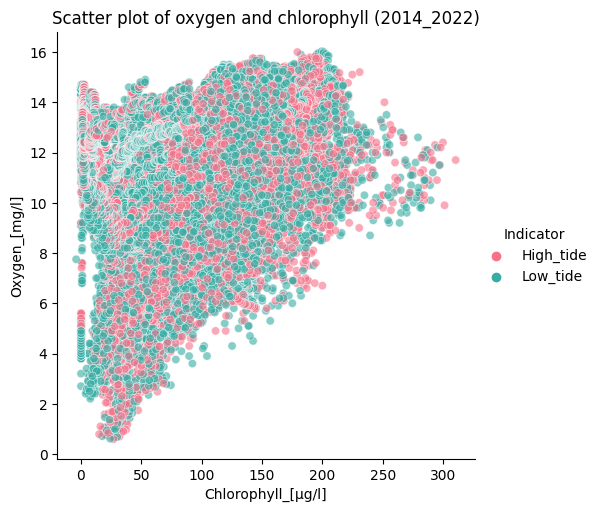

In [77]:
#Create a palette with 9 colors
custom_palette = sns.color_palette("husl", 2)
#Plot the graph
fig = sns.relplot(x = 'Chlorophyll_[µg/l]', y = 'Oxygen_[mg/l]', data = df_o_cl__tide_datehr, kind = 'scatter', hue = 'Indicator',
            alpha = 0.6, palette = custom_palette).set(title = "Scatter plot of oxygen and chlorophyll (2014_2022)")
plt.show()

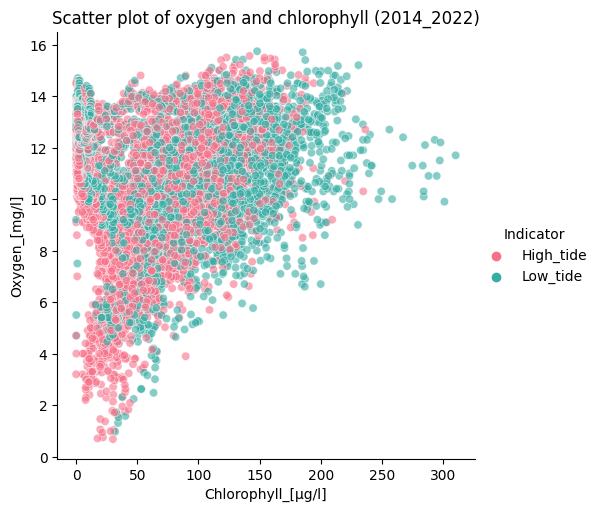

In [78]:
#Create a palette with 9 colors
custom_palette = sns.color_palette("husl", 2)
#Plot the graph
fig = sns.relplot(x = 'Chlorophyll_[µg/l]', y = 'Oxygen_[mg/l]', data = df_o_cl__tide_datehr_afterpeak, kind = 'scatter', hue = 'Indicator',
            alpha = 0.6, palette = custom_palette).set(title = "Scatter plot of oxygen and chlorophyll (2014_2022)")
plt.show()

In [102]:
#Removing rows between 1st November till 1st March
df_winterout = df_o_cl__tide_datehr.copy(deep=True)
df_winterout['Month'].replace([11, 12, 1, 2], np.nan, inplace = True)
df_winterout

Date_Hour  Chlorophyll_[µg/l]  Oxygen_[mg/l]  \
0      2014-01-01 01:00:00+00:00                5.08          12.80   
1      2014-01-01 02:00:00+00:00                4.75          12.90   
2      2014-01-01 03:10:00+00:00                4.39          12.90   
3      2014-01-01 03:58:00+00:00                 NaN            NaN   
4      2014-01-01 04:10:00+00:00                4.47          12.90   
...                          ...                 ...            ...   
109528 2022-12-28 02:20:00+00:00                1.87          13.02   
109529 2022-12-28 03:30:00+00:00                0.53          13.04   
109530 2022-12-28 04:40:00+00:00                0.00          12.92   
109531 2022-12-28 05:50:00+00:00                1.36          12.98   
109532 2022-12-28 07:00:00+00:00                1.93          12.92   

        High_tide_[cm]  Low_tide_[cm]  Indicator  Year  Month  
0                  0.0            0.0  High_tide  2014    NaN  
1                  0.0            0.0  High_tide  2014    NaN  
2                  0.0            0.0  High_tide  2014    NaN  
3                  2.0            0.0  High_tide  2014    NaN  
4                  0.0            0.0   Low_tide  2014    NaN  
...                ...            ...        ...   ...    ...  
109528             0.0            0.0        NaN  2022    NaN  
109529             0.0            0.0        NaN  2022    NaN  
109530             0.0            0.0        NaN  2022    NaN  
109531             0.0            0.0        NaN  2022    NaN  
109532             0.0            0.0        NaN  2022    NaN  

[109533 rows x 8 columns]

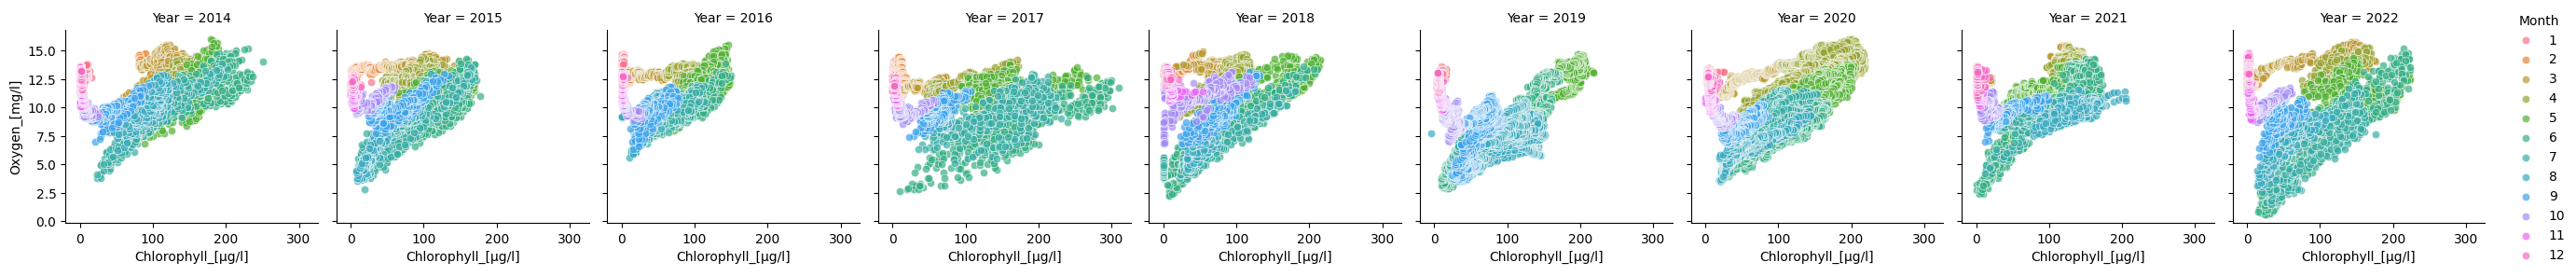

In [80]:
g = sns.FacetGrid(df_o_cl__tide_datehr, col="Year", hue = 'Month')
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.7 )
g.add_legend()

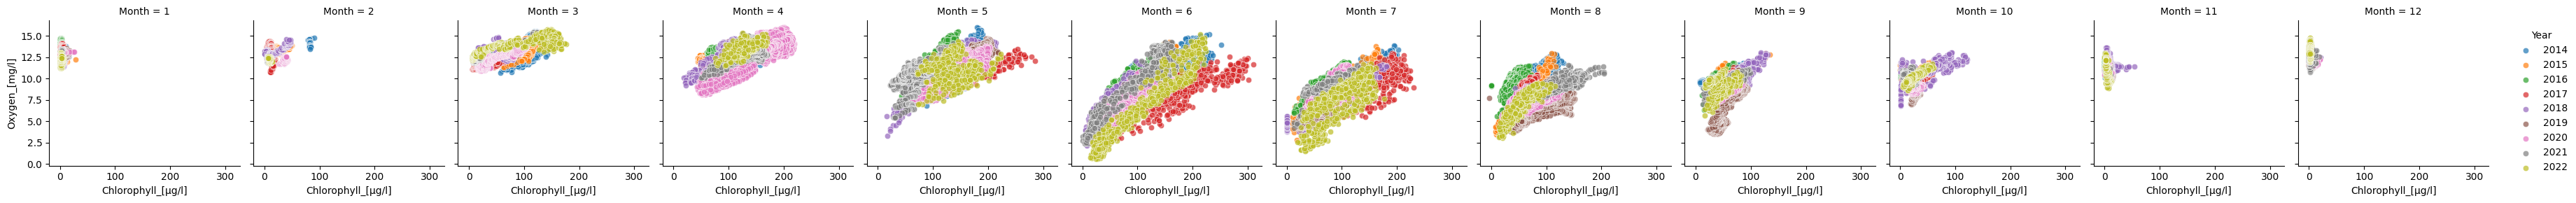

In [81]:
g = sns.FacetGrid(df_o_cl__tide_datehr, col="Month", hue = 'Year')
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.7 )
g.add_legend()

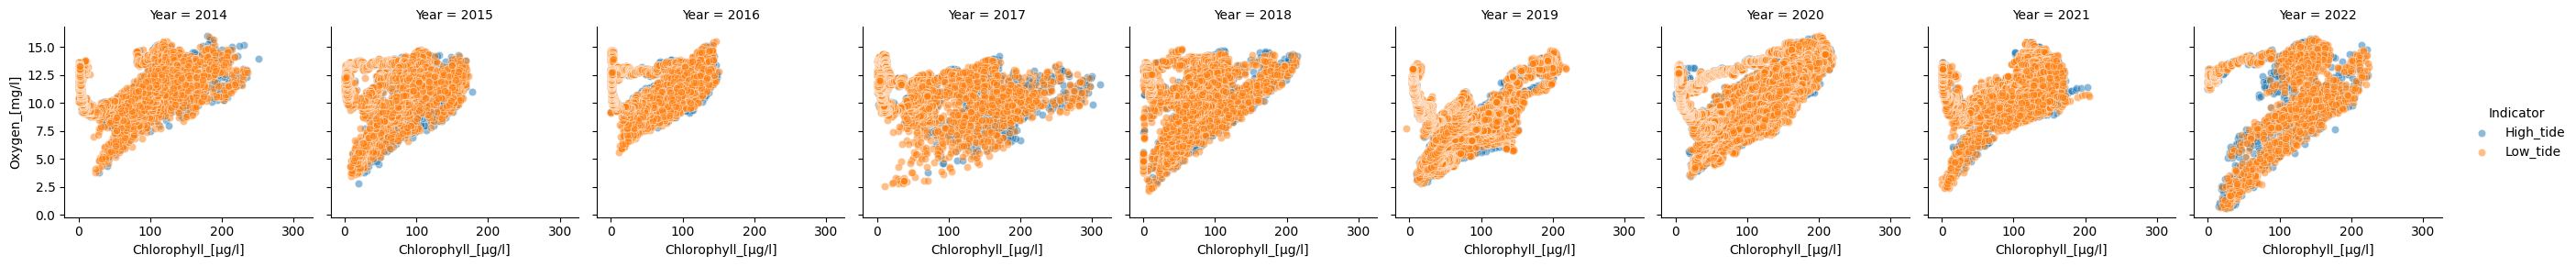

In [82]:
g = sns.FacetGrid(df_o_cl__tide_datehr, col="Year", hue = 'Indicator')
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.5 )
g.add_legend()

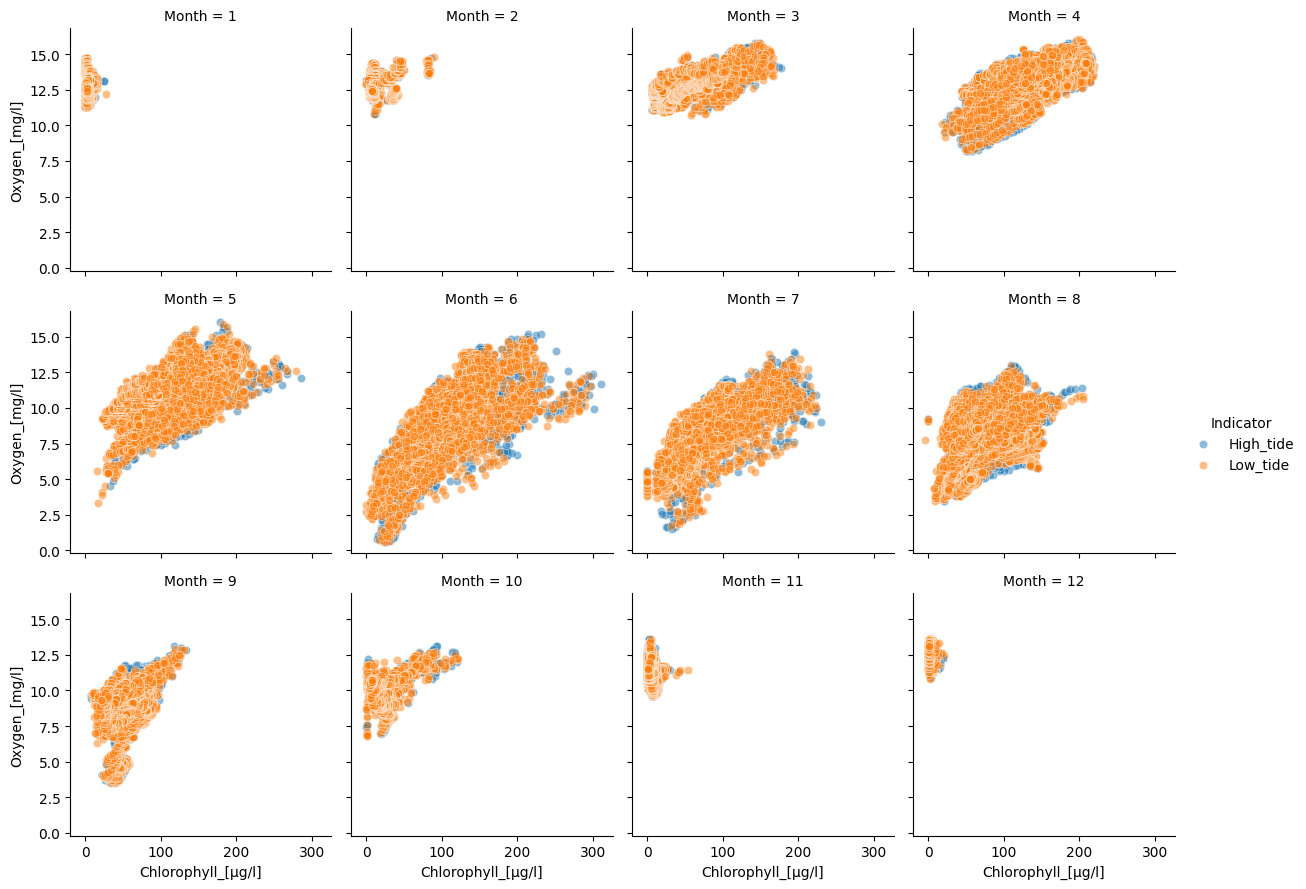

In [83]:
g = sns.FacetGrid(df_o_cl__tide_datehr, col="Month", col_wrap = 4, hue = 'Indicator')
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.5 )
g.add_legend()

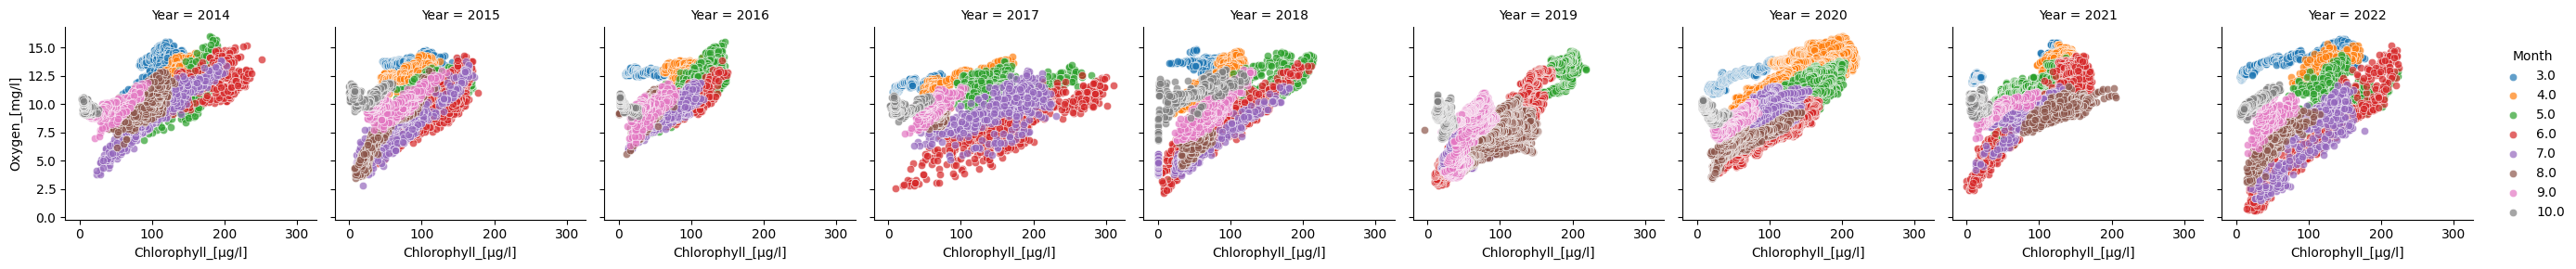

In [103]:
g = sns.FacetGrid(df_winterout, col="Year", hue = 'Month')
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.7 )
g.add_legend()

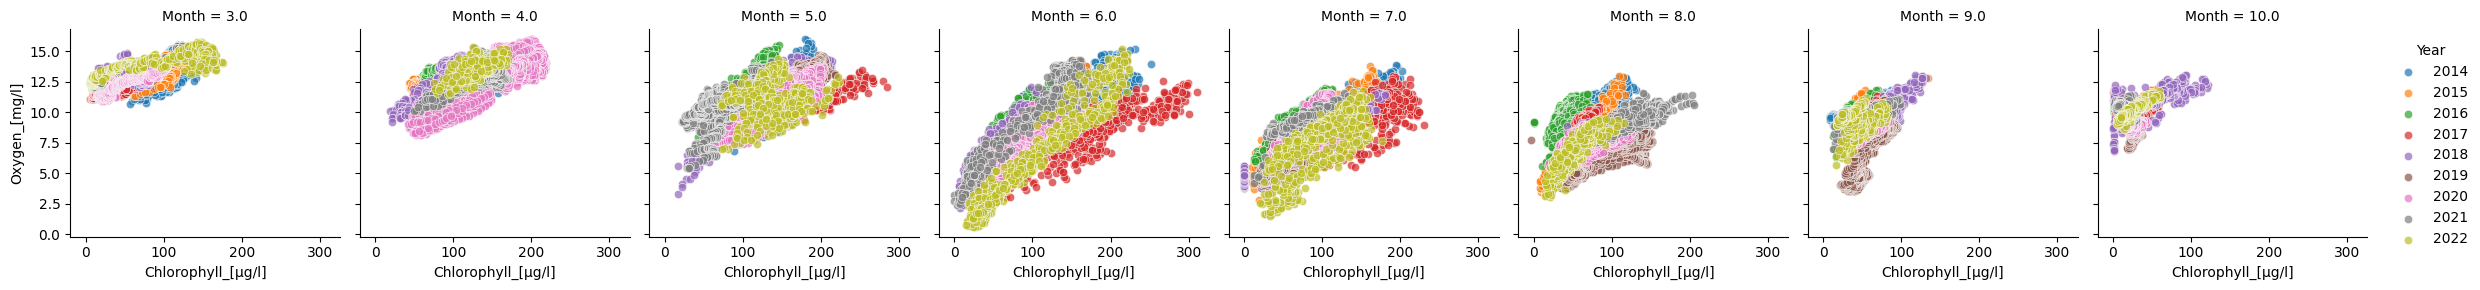

In [104]:
g = sns.FacetGrid(df_winterout, col="Month", hue = 'Year')
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.7 )
g.add_legend()

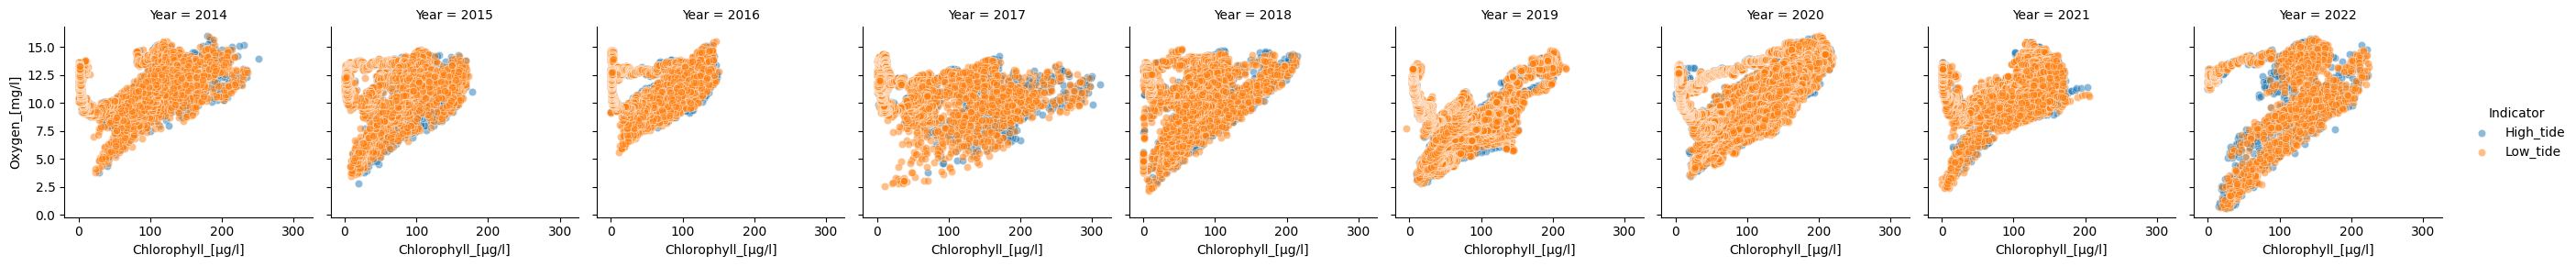

In [86]:
g = sns.FacetGrid(df_winterout, col="Year", hue = 'Indicator')
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.5 )
g.add_legend()

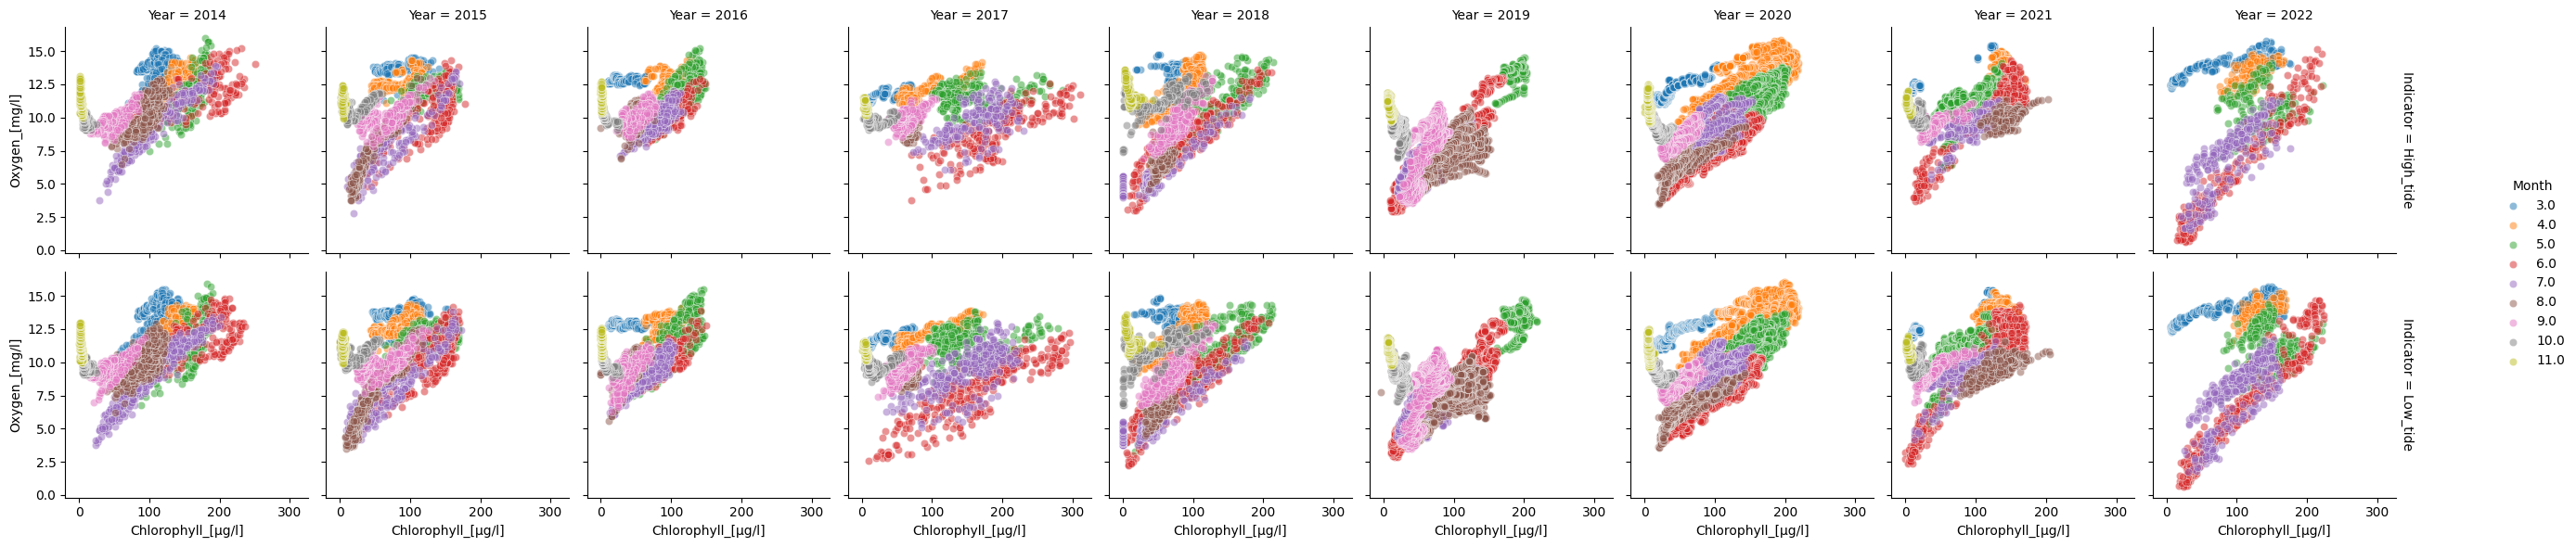

In [87]:
g = sns.FacetGrid(df_winterout, col="Year", row= 'Indicator', hue = 'Month', margin_titles = True)
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.5 )
g.add_legend()

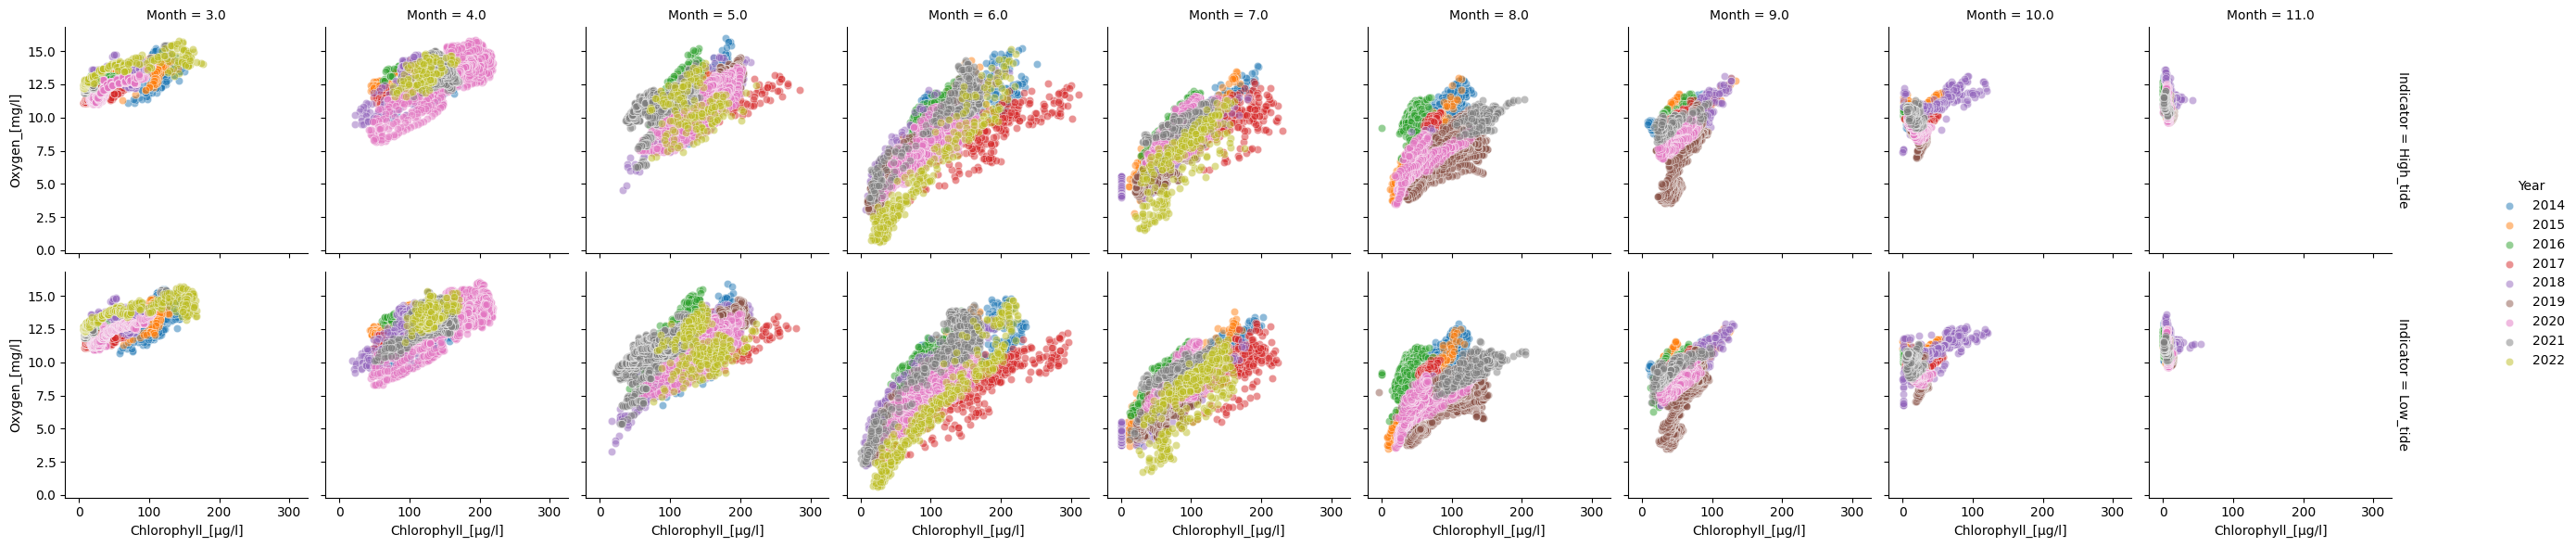

In [88]:
g = sns.FacetGrid(df_winterout, col="Month", row= 'Indicator', hue = 'Year', margin_titles = True)
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.5 )
g.add_legend()

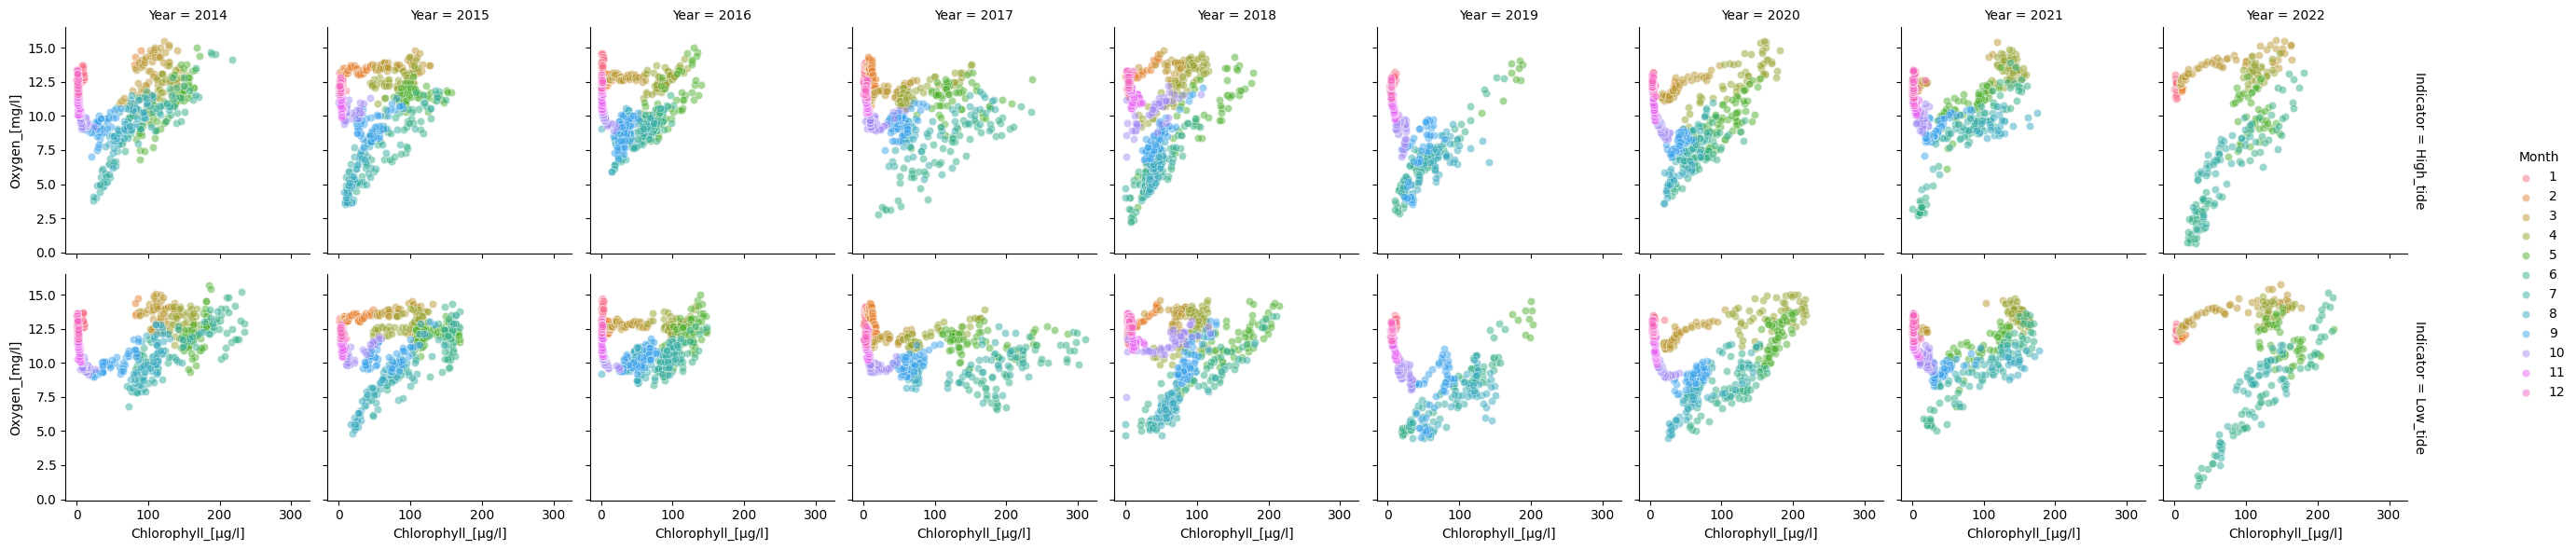

In [89]:
g = sns.FacetGrid(df_o_cl__tide_datehr_afterpeak, col="Year", row= 'Indicator', hue = 'Month', margin_titles = True)
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.5 )
g.add_legend()

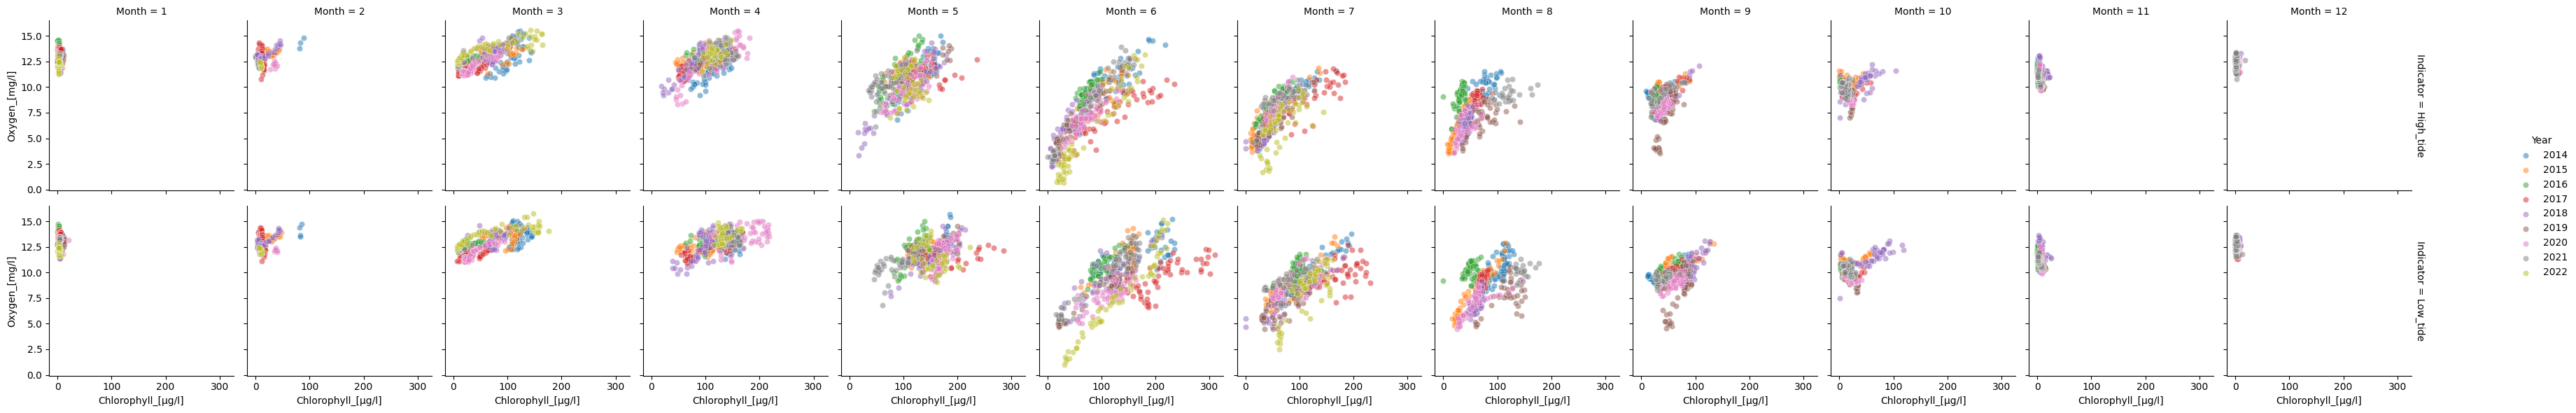

In [90]:
g = sns.FacetGrid(df_o_cl__tide_datehr_afterpeak, col="Month", row= 'Indicator', hue = 'Year', margin_titles = True)
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.5 )
g.add_legend()

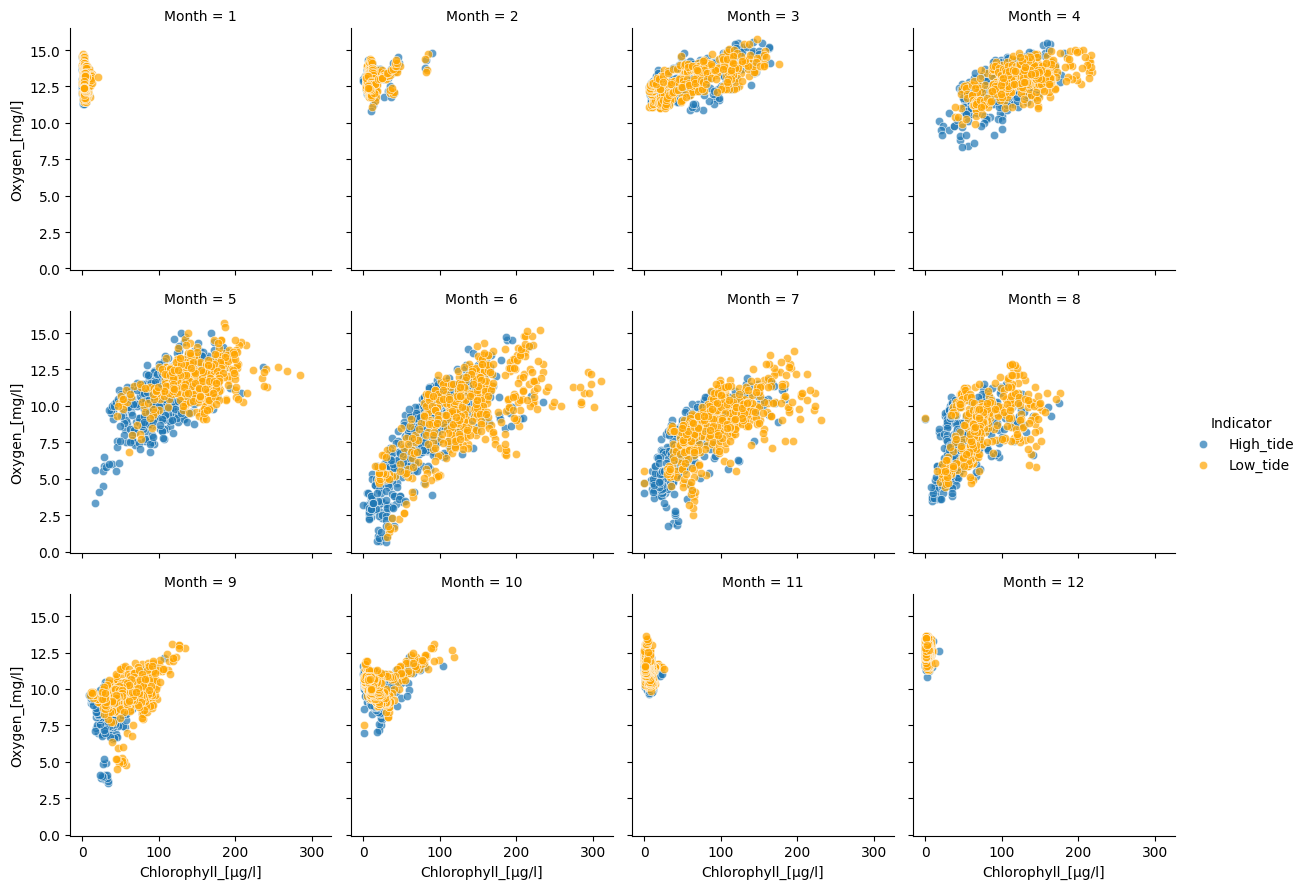

In [92]:
g = sns.FacetGrid(df_o_cl__tide_datehr_afterpeak, col="Month", col_wrap=4, hue = 'Indicator', margin_titles = True, palette = {'Low_tide' : 'orange', 'High_tide' : 'tab:blue'})
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.7 )
g.add_legend()

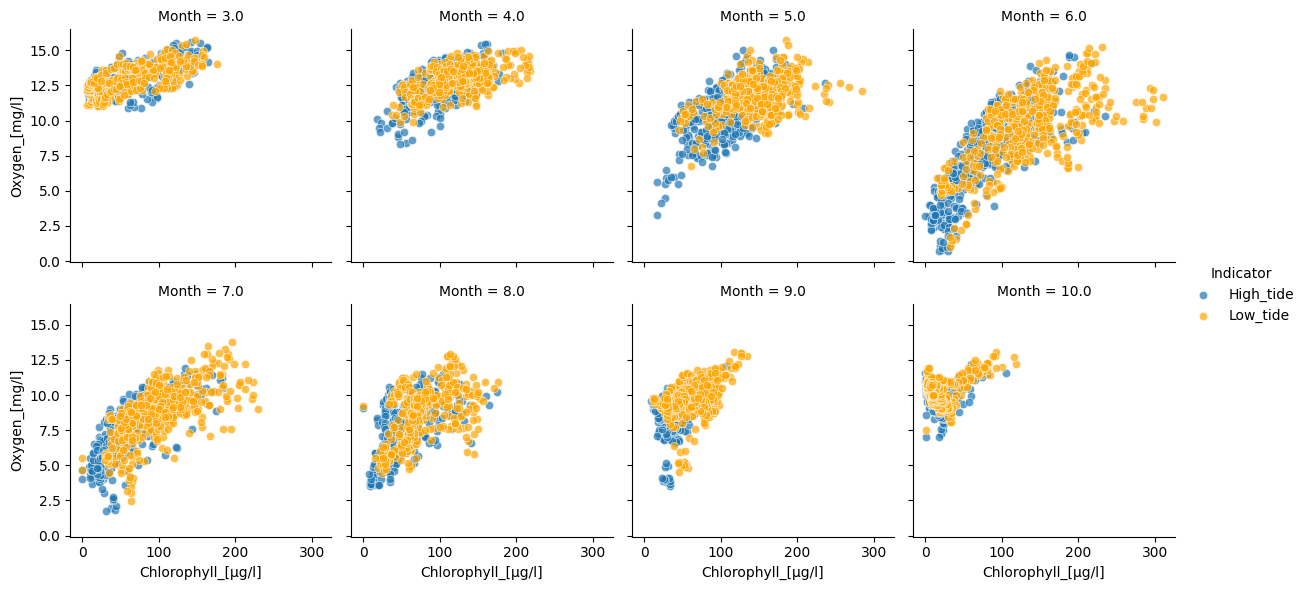

In [106]:
#Removing Jan, Feb, Nov, and Dec 
df_o_cl__tide_datehr_afterpeak_winterout =  df_o_cl__tide_datehr_afterpeak.copy(deep=True)
df_o_cl__tide_datehr_afterpeak_winterout['Month'].replace([11, 12, 1, 2], np.nan, inplace = True)
g = sns.FacetGrid(df_o_cl__tide_datehr_afterpeak_winterout, col="Month", col_wrap=4, hue = 'Indicator', margin_titles = True, palette = {'Low_tide' : 'orange', 'High_tide' : 'tab:blue'})
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "Oxygen_[mg/l]", alpha=.7 )
g.add_legend()

In [93]:
#Checking the missing values for Chlorophyll and O2
df_o_cl__tide_datehr_afterpeak.isnull().sum()


Date_Hour                0
Chlorophyll_[µg/l]    2169
Oxygen_[mg/l]         2169
High_tide_[cm]           0
Low_tide_[cm]            0
Indicator                1
Year                     0
Month                    0
dtype: int64

In [94]:
#Showing the missing values for Chlorophyll and O2
df_o_cl__tide_datehr_afterpeak[df_o_cl__tide_datehr_afterpeak['Chlorophyll_[µg/l]'].isna()]

Date_Hour  Chlorophyll_[µg/l]  Oxygen_[mg/l]  \
598    2014-01-24 21:36:00+00:00                 NaN            NaN   
599    2014-01-25 05:26:00+00:00                 NaN            NaN   
600    2014-01-25 09:45:00+00:00                 NaN            NaN   
601    2014-01-25 17:54:00+00:00                 NaN            NaN   
602    2014-01-25 22:44:00+00:00                 NaN            NaN   
...                          ...                 ...            ...   
105161 2022-05-29 23:47:00+00:00                 NaN            NaN   
105162 2022-05-30 04:22:00+00:00                 NaN            NaN   
105163 2022-05-30 12:07:00+00:00                 NaN            NaN   
106408 2022-07-20 21:55:00+00:00                 NaN            NaN   
106409 2022-07-21 05:29:00+00:00                 NaN            NaN   

        High_tide_[cm]  Low_tide_[cm]  Indicator  Year  Month  
598                2.0            0.0   Low_tide  2014      1  
599                0.0            1.0  High_tide  2014      1  
600                2.0            0.0   Low_tide  2014      1  
601                0.0            1.0  High_tide  2014      1  
602                2.0            0.0   Low_tide  2014      1  
...                ...            ...        ...   ...    ...  
105161             0.0            1.0  High_tide  2022      5  
105162             2.0            0.0   Low_tide  2022      5  
105163             0.0            1.0  High_tide  2022      5  
106408             2.0            0.0   Low_tide  2022      7  
106409             0.0            1.0  High_tide  2022      7  

[2169 rows x 8 columns]

In [117]:
df_o_cl__tide_datehr_afterpeak.dropna(inplace = True)
df_o_cl__tide_datehr_afterpeak_winterout.dropna(inplace = True)



C:\Users\Shayan Kamali\AppData\Local\Temp\ipykernel_9236\3999286917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o_cl__tide_datehr_afterpeak.dropna(inplace = True)


In [118]:
low_tide = df_o_cl__tide_datehr_afterpeak[df_o_cl__tide_datehr_afterpeak['Indicator'] == 'Low_tide']
high_tide = df_o_cl__tide_datehr_afterpeak[df_o_cl__tide_datehr_afterpeak['Indicator'] == 'High_tide']

In [189]:
#T-test between ch and O2 average content in high tides and low tides
stats.ttest_ind(low_tide[['Oxygen_[mg/l]', 'Chlorophyll_[µg/l]']], high_tide[['Oxygen_[mg/l]', 'Chlorophyll_[µg/l]']],
                equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=array([14.61837051, 17.33114811]), pvalue=array([6.72668696e-48, 2.57075327e-66]))

In [150]:
low_tide[['Oxygen_[mg/l]', 'Chlorophyll_[µg/l]']].mean()

Oxygen_[mg/l]         11.053966
Chlorophyll_[µg/l]    66.090423
dtype: float64

In [151]:
high_tide[['Oxygen_[mg/l]', 'Chlorophyll_[µg/l]']].mean()

Oxygen_[mg/l]         10.355935
Chlorophyll_[µg/l]    47.338473
dtype: float64

In [126]:
#T-test for without winter
low_tide_winterout = df_o_cl__tide_datehr_afterpeak_winterout[df_o_cl__tide_datehr_afterpeak_winterout['Indicator'] == 'Low_tide']
high_tide_winterout = df_o_cl__tide_datehr_afterpeak_winterout[df_o_cl__tide_datehr_afterpeak_winterout['Indicator'] == 'High_tide']
high_tide_winterout

Date_Hour  Chlorophyll_[µg/l]  Oxygen_[mg/l]  \
770    2014-03-01 05:10:00+00:00               83.47          13.40   
783    2014-03-01 17:10:00+00:00               86.86          13.90   
797    2014-03-02 06:10:00+00:00               82.60          13.50   
810    2014-03-02 18:10:00+00:00               86.57          13.90   
824    2014-03-03 07:20:00+00:00               89.37          13.60   
...                          ...                 ...            ...   
106607 2022-07-29 06:00:00+00:00               46.13           5.83   
106620 2022-07-29 18:40:00+00:00               54.88           6.46   
106633 2022-07-30 06:10:00+00:00               32.40           5.30   
106646 2022-07-30 18:50:00+00:00               43.33           5.63   
106659 2022-07-31 07:30:00+00:00               56.58           5.80   

        High_tide_[cm]  Low_tide_[cm]  Indicator  Year  Month  
770                0.0            0.0  High_tide  2014    3.0  
783                0.0            0.0  High_tide  2014    3.0  
797                0.0            0.0  High_tide  2014    3.0  
810                0.0            0.0  High_tide  2014    3.0  
824                0.0            0.0  High_tide  2014    3.0  
...                ...            ...        ...   ...    ...  
106607             0.0            0.0  High_tide  2022    7.0  
106620             0.0            0.0  High_tide  2022    7.0  
106633             0.0            0.0  High_tide  2022    7.0  
106646             0.0            0.0  High_tide  2022    7.0  
106659             0.0            0.0  High_tide  2022    7.0  

[3529 rows x 8 columns]

In [152]:
high_tide_winterout[['Oxygen_[mg/l]', 'Chlorophyll_[µg/l]']].mean()

Oxygen_[mg/l]          9.604542
Chlorophyll_[µg/l]    64.814055
dtype: float64

In [153]:
low_tide_winterout[['Oxygen_[mg/l]', 'Chlorophyll_[µg/l]']].mean()

Oxygen_[mg/l]         10.529301
Chlorophyll_[µg/l]    91.098537
dtype: float64

In [190]:
#T-test between ch and )2 average content in high tides and low tides
stats.ttest_ind(low_tide_winterout[['Oxygen_[mg/l]', 'Chlorophyll_[µg/l]']], high_tide_winterout[['Oxygen_[mg/l]', 'Chlorophyll_[µg/l]']])

Ttest_indResult(statistic=array([15.55048296, 21.9505994 ]), pvalue=array([1.23035890e-053, 2.40455718e-103]))

In [127]:
#T-test for May
low_tide_winterout5 = df_o_cl__tide_datehr_afterpeak_winterout[(df_o_cl__tide_datehr_afterpeak_winterout['Indicator'] == 'Low_tide') & (df_o_cl__tide_datehr_afterpeak_winterout['Month'] == 5)]
high_tide_winterout5= df_o_cl__tide_datehr_afterpeak_winterout[(df_o_cl__tide_datehr_afterpeak_winterout['Indicator'] == 'High_tide') & (df_o_cl__tide_datehr_afterpeak_winterout['Month'] == 5)]
high_tide_winterout5

Date_Hour  Chlorophyll_[µg/l]  Oxygen_[mg/l]  \
2146   2014-05-01 07:10:00+00:00               83.32           8.30   
2159   2014-05-01 19:00:00+00:00               92.31           9.30   
2172   2014-05-02 07:00:00+00:00               91.10           8.60   
2186   2014-05-02 20:10:00+00:00               89.77           9.10   
2199   2014-05-03 08:10:00+00:00               90.21           8.70   
...                          ...                 ...            ...   
105117 2022-05-23 11:00:00+00:00              136.71           8.92   
105129 2022-05-23 22:30:00+00:00               92.27           7.88   
105169 2022-05-30 17:20:00+00:00              118.49           8.12   
105182 2022-05-31 06:10:00+00:00              146.30           8.75   
105194 2022-05-31 17:40:00+00:00              129.65           9.49   

        High_tide_[cm]  Low_tide_[cm]  Indicator  Year  Month  
2146               0.0            0.0  High_tide  2014    5.0  
2159               0.0            0.0  High_tide  2014    5.0  
2172               0.0            0.0  High_tide  2014    5.0  
2186               0.0            0.0  High_tide  2014    5.0  
2199               0.0            0.0  High_tide  2014    5.0  
...                ...            ...        ...   ...    ...  
105117             0.0            0.0  High_tide  2022    5.0  
105129             0.0            0.0  High_tide  2022    5.0  
105169             0.0            0.0  High_tide  2022    5.0  
105182             0.0            0.0  High_tide  2022    5.0  
105194             0.0            0.0  High_tide  2022    5.0  

[462 rows x 8 columns]

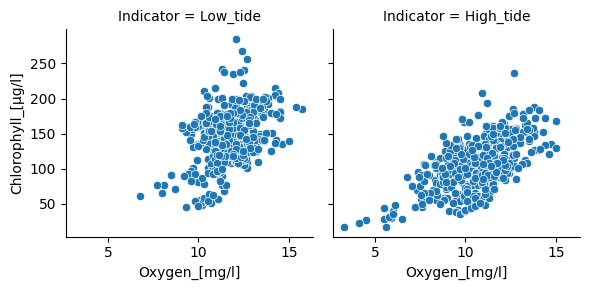

In [179]:
c = sns.FacetGrid(df_o_cl__tide_datehr_afterpeak_winterout[(df_o_cl__tide_datehr_afterpeak_winterout['Month'] == 5], col="Indicator")
c.map(sns.scatterplot, 'Oxygen_[mg/l]', "Chlorophyll_[µg/l]")


In [186]:
#T-test between ch and )2 average content in high tides and low tides in May 5
stats.ttest_ind(low_tide_winterout5[['Oxygen_[mg/l]', 'Chlorophyll_[µg/l]']], high_tide_winterout5[['Oxygen_[mg/l]', 'Chlorophyll_[µg/l]']])

Ttest_indResult(statistic=array([11.09217996, 16.32023993]), pvalue=array([6.38621279e-27, 8.85428849e-53]))

In [180]:
#T-test between ch and )2 average content in high tides and low tides in May 5
stats.ttest_ind(low_tide_winterout5['Oxygen_[mg/l]'], high_tide_winterout5['Oxygen_[mg/l]'],
                equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=11.100743666437252, pvalue=9.052274843126299e-27)